## Installing Packages

In [1]:
!pip install numpy==1.23.5 nibabel scipy==1.9.3 scikit-image matplotlib

  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\~2mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install freesurfer-surface

In [3]:
!pip install numpy-stl

In [4]:
!pip install mayavi

In [5]:
!pip install PyQt5

In [6]:
!pip install ipywidgets

In [7]:
!pip install ipyevents

In [8]:
!jupyter nbextension install --py mayavi --user

Installing C:\ProgramData\anaconda3\lib\site-packages\mayavi\tools/static -> mayavi
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\LICENSE.txt
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\x3dom.css
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\x3dom.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable mayavi --user --py
    


In [9]:
!jupyter nbextension enable --py mayavi --user

Enabling notebook extension mayavi/x3d/x3dom...
      - Validating: ok


## Importing Packages

In [10]:
import numpy as np
import nibabel as nib
from scipy.ndimage import binary_dilation, binary_fill_holes, binary_erosion
from skimage.measure import marching_cubes
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [11]:
def fill_sulci(volume):
    # Dilate the volume
    dilated = binary_dilation(volume)

    # Fill holes in the volume
    filled = binary_fill_holes(dilated)

    # Erode the volume
    eroded = binary_erosion(filled)

    return eroded

## Defining Variables

In [12]:
import os
from skimage import morphology

INPUT_SURFACE = "invivo/mesh_1.pial"
ANNOT = 'invivo/mesh_1.annot'
FILL = True
OUTPUT_FILLED_SURFACE = "outsurfs/invivo_filled.mgz"
OUTPUT_CLOSED_SURFACE = "outsurfs/invivo_closed.mgz"
RADIUS = 5

In [13]:
# Load surface mesh using nibabel freesurfer read_geometry
vertices, faces = nib.freesurfer.read_geometry(INPUT_SURFACE)

In [14]:
vertices.shape,faces.shape

((166737, 3), (333470, 3))

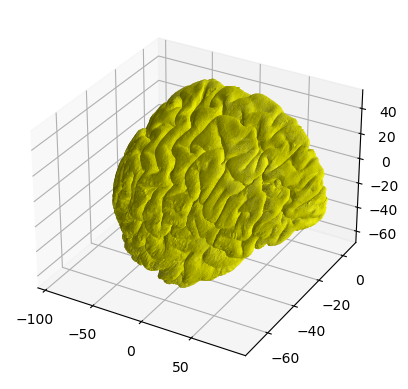

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vertices[:, 1], vertices[:, 0], faces, vertices[:, 2],color='yellow', shade=True)
cmap = plt.get_cmap('hot')
plt.set_cmap(cmap)
plt.show()

In [16]:
labels, ctab, names = nib.freesurfer.read_annot('invivo/mesh_1.annot')

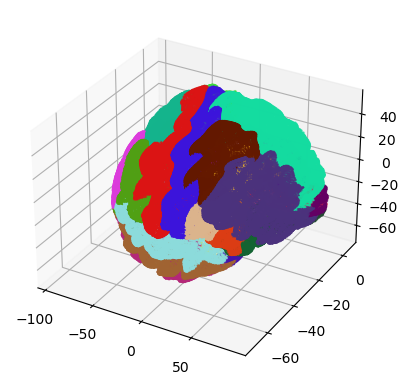

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vertices[:, 1], vertices[:, 0], vertices[:, 2], c=ctab[labels][:, :3] / 255., s=1)
plt.show()

In [18]:
from mayavi import mlab

mlab.triangular_mesh(vertices[:, 0], vertices[:, 1], vertices[:, 2], faces)
mlab.show()

## Filling Meshes

In [19]:
# Filling in mesh at high resolution
if FILL:
    print("Filling in mesh at high resolution")
    os.system(f"mris_fill -r 0.2 {INPUT_SURFACE} {OUTPUT_FILLED_SURFACE}")

Filling in mesh at high resolution


In [20]:
invivo_filled_res_3 = "invivo_filled/03/filled_mesh_1.mgz"
invivo_filled_res_4 = "invivo_filled/04/filled_mesh_1.mgz"
invivo_filled_res_5 = "invivo_filled/05/filled_mesh_1.mgz"

In [21]:
# Closing deep suci
print("Closing deep sulci")

## Read MRI data
mri3 = nib.load(invivo_filled_res_3)
mri4 = nib.load(invivo_filled_res_4)
mri5 = nib.load(invivo_filled_res_5)

Closing deep sulci


In [22]:
pad=10
data3 = np.zeros(np.asarray(mri3.get_fdata().shape) +2*pad)
data3[pad:-pad, pad:-pad, pad:-pad] = mri3.get_fdata()>0.5
max_slices = data3.shape[1] - 1

In [23]:
pad=10
data4 = np.zeros(np.asarray(mri4.get_fdata().shape) +2*pad)
data4[pad:-pad, pad:-pad, pad:-pad] = mri4.get_fdata()>0.5
max_slices = data4.shape[1] - 1

In [24]:
pad=10
data5 = np.zeros(np.asarray(mri5.get_fdata().shape) +2*pad)
data5[pad:-pad, pad:-pad, pad:-pad] = mri5.get_fdata()>0.5
max_slices = data5.shape[1] - 1

Text(0.5, 1.0, 'Central Slice After Filling Res=5')

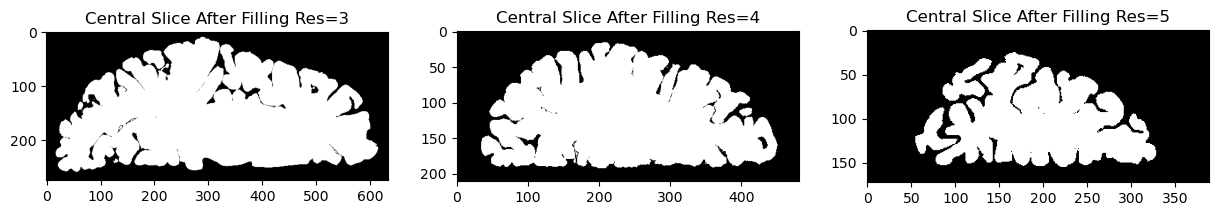

In [25]:
fig, axs = plt.subplots(1,3,figsize=(15, 15))

axs[0].imshow(data3[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[0].set_title('Central Slice After Filling Res=3')
axs[1].imshow(data4[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[1].set_title('Central Slice After Filling Res=4')
axs[2].imshow(data5[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[2].set_title('Central Slice After Filling Res=5')


In [26]:
mri3.shape

(255, 614, 398)

In [27]:
mri4.shape

(191, 461, 299)

In [28]:
mri5.shape

(153, 369, 239)

<IPython.core.display.Javascript object>


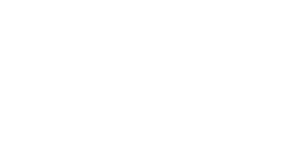

<OrthoSlicer3D: invivo_filled/03/filled_mesh_1.mgz (255, 614, 398)>

In [29]:
%matplotlib notebook
mri3.orthoview()

<IPython.core.display.Javascript object>


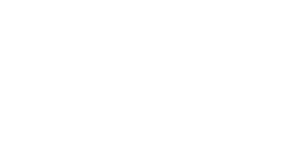

<OrthoSlicer3D: invivo_filled/04/filled_mesh_1.mgz (191, 461, 299)>

In [30]:
mri4.orthoview()

<IPython.core.display.Javascript object>


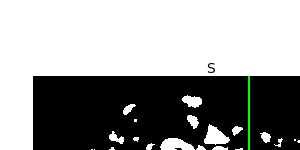

<OrthoSlicer3D: invivo_filled/05/filled_mesh_1.mgz (153, 369, 239)>

In [31]:
mri5.orthoview()

## Closing Meshes

In [32]:
from scipy.ndimage import binary_dilation
from scipy.ndimage import binary_fill_holes
from scipy.ndimage import binary_erosion

In [33]:
volume_data_3 = nib.load(invivo_filled_res_3)
volume_data_4 = nib.load(invivo_filled_res_4)
volume_data_5 = nib.load(invivo_filled_res_5)

In [34]:
# Create data array
pad = 10
mask_data_3 = np.zeros(np.asarray(volume_data_3.get_fdata().shape) +2*pad)
mask_data_3[pad:-pad, pad:-pad, pad:-pad] = volume_data_3.get_fdata()>0.5
print(mask_data_3.shape)

(275, 634, 418)


In [35]:
mask_data_3 = morphology.closing(
    mask_data_3, 
    morphology.ball(1.75/0.3)
)

In [36]:
# Create data array
pad = 10
mask_data_4 = np.zeros(np.asarray(volume_data_4.get_fdata().shape) +2*pad)
mask_data_4[pad:-pad, pad:-pad, pad:-pad] = volume_data_4.get_fdata()>0.5
print(mask_data_4.shape)

(211, 481, 319)


In [37]:
mask_data_4 = morphology.closing(
    mask_data_4, 
    morphology.ball(1.75/0.4)
)

In [38]:
# Create data array
pad = 10
mask_data_5 = np.zeros(np.asarray(volume_data_5.get_fdata().shape) +2*pad)
mask_data_5[pad:-pad, pad:-pad, pad:-pad] = volume_data_5.get_fdata()>0.5
print(mask_data_5.shape)

(173, 389, 259)


In [39]:
mask_data_5 = morphology.closing(
    mask_data_5, 
    morphology.ball(1.75/0.5)
)

Text(0.5, 1.0, 'Central Slice After Closing Res=5')

<IPython.core.display.Javascript object>


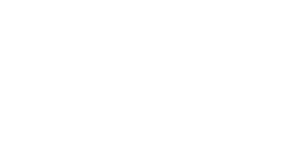

<IPython.core.display.Javascript object>


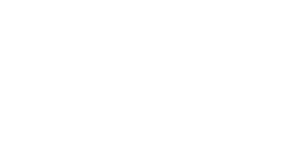

<IPython.core.display.Javascript object>


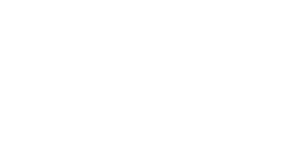

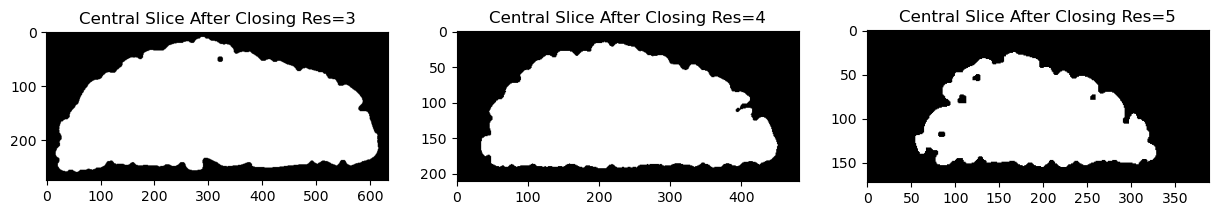

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most rece

In [40]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(15, 15))

axs[0].imshow(mask_data_3[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[0].set_title('Central Slice After Closing Res=3')
axs[1].imshow(mask_data_4[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[1].set_title('Central Slice After Closing Res=4')
axs[2].imshow(mask_data_5[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[2].set_title('Central Slice After Closing Res=5')


## Dilating, Binary Fill Holes, and Eroding

In [41]:
# mask_data_3 = np.zeros(volume_data_3.shape)
# mask_data_3[volume_data_3 > np.percentile(volume_data_3[volume_data_3 > 0], q=99)] = 1
print("Dilating")
mask_data_dilated_3 = morphology.dilation(mask_data_3, morphology.ball(1.75/0.3))

## Fill holes
print("Filling holes")
# data = morphology.flood_fill(mask_data_dilated_3)
mask_data_filled_3 = binary_fill_holes(mask_data_dilated_3)
# mask_data_filled_3 = morphology.remove_small_holes(mask_data_dilated_3, area_threshold=1000)
## Erode
print("Eroding")
mask_data_eroded_3 = morphology.erosion(mask_data_filled_3, morphology.ball(1.75/0.3))

print("Area closing")
mask_data_closed_3 = morphology.area_closing(mask_data_eroded_3, 64, connectivity=1)

# mask_data_dilated_3 = binary_dilation(mask_data_3)
# mask_data_filled_3 = binary_fill_holes(mask_data_dilated_3)
# mask_data_eroded_3 = binary_erosion(mask_data_filled_3)

nib.save(nib.Nifti1Image(mask_data_eroded_3.astype(np.uint8), affine=np.eye(4)), 'outsurfs/invivo_closed_3.nii.gz')

Dilating
Filling holes
Eroding
Area closing


In [42]:
# mask_data_4 = np.zeros(volume_data_4.shape)
# mask_data_4[volume_data_4 > np.percentile(volume_data_4[volume_data_4 > 0], q=99)] = 1
print("Dilating")
mask_data_dilated_4 = morphology.dilation(mask_data_4, morphology.ball(1.75/0.4))

## Fill holes
print("Filling holes")
# mask_data_filled_4 = morphology.flood_fill(mask_data_dilated_4)
mask_data_filled_4 = binary_fill_holes(mask_data_dilated_4)
# mask_data_dilated_4 = morphology.remove_small_holes(mask_data_dilated_4, area_threshold=1000)

## Erode
print("Eroding")
mask_data_eroded_4 = morphology.erosion(mask_data_filled_4, morphology.ball(1.75/0.4))

print("Area closing")
mask_data_closed_3 = morphology.area_closing(mask_data_eroded_3, 64, connectivity=1)

# mask_data_dilated_4 = morph.binary_dilation(mask_data_4)
# mask_data_filled_4 = morph.binary_fill_holes(mask_data_dilated_4)
# mask_data_eroded_4 = morph.binary_erosion(mask_data_filled_4)

nib.save(nib.Nifti1Image(mask_data_eroded_4.astype(np.uint8), affine=np.eye(4)), 'outsurfs/invivo_closed_4.nii.gz')

Dilating
Filling holes
Eroding
Area closing


In [43]:
# mask_data_5 = np.zeros(volume_data_5.shape)
# mask_data_5[volume_data_5 > np.percentile(volume_data_5[volume_data_5 > 0], q=99)] = 1
# Operations
## Dilate
print("Dilating")
mask_data_dilated_5 = morphology.dilation(mask_data_5, morphology.ball(1.75/0.5))

## Fill holes
print("Filling holes")
# mask_data_filled_5 = morphology.flood_fill(mask_data_dilated_5)
mask_data_filled_5 = binary_fill_holes(mask_data_dilated_5)
# mask_data_dilated_5 = morphology.remove_small_holes(mask_data_dilated_5, area_threshold=1000)

## Erode
print("Eroding")
mask_data_eroded_5 = morphology.erosion(mask_data_filled_5, morphology.ball(1.75/0.5))
print("Area closing")
mask_data_closed_3 = morphology.area_closing(mask_data_eroded_3, 64, connectivity=1)

## Fill holes
# mask_data_dilated_5 = morph.binary_dilation(mask_data_5)
# mask_data_filled_5 = morph.binary_fill_holes(mask_data_dilated_5)
# mask_data_eroded_5 = morph.binary_erosion(mask_data_filled_5)

nib.save(nib.Nifti1Image(mask_data_eroded_5.astype(np.uint8), affine=np.eye(4)), 'outsurfs/invivo_closed_5.nii.gz')

Dilating
Filling holes
Eroding
Area closing


Text(0.5, 1.0, 'Dilation, Filling and Erosion Res=5')

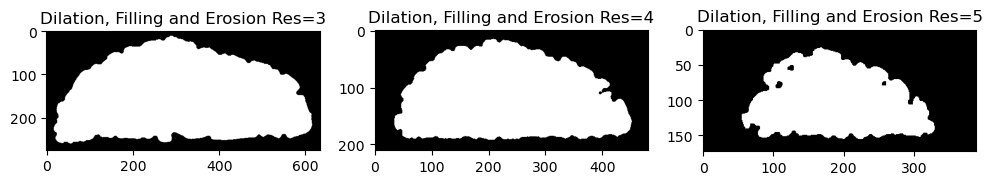

In [44]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(12, 12))

axs[0].imshow(mask_data_eroded_3[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[0].set_title('Dilation, Filling and Erosion Res=3')
axs[1].imshow(mask_data_eroded_4[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[1].set_title('Dilation, Filling and Erosion Res=4')
axs[2].imshow(mask_data_eroded_5[:,:,max_slices//2], cmap="gray", aspect='equal')
axs[2].set_title('Dilation, Filling and Erosion Res=5')

In [45]:
volume_data_3 = nib.load('outsurfs/invivo_closed_3.nii.gz')
volume_data_4 = nib.load("outsurfs/invivo_closed_4.nii.gz")
volume_data_5 = nib.load("outsurfs/invivo_closed_5.nii.gz")

In [46]:
volume_data_3.shape

(275, 634, 418)

In [47]:
volume_data_4.shape

(211, 481, 319)

In [48]:
volume_data_5.shape

(173, 389, 259)

<IPython.core.display.Javascript object>


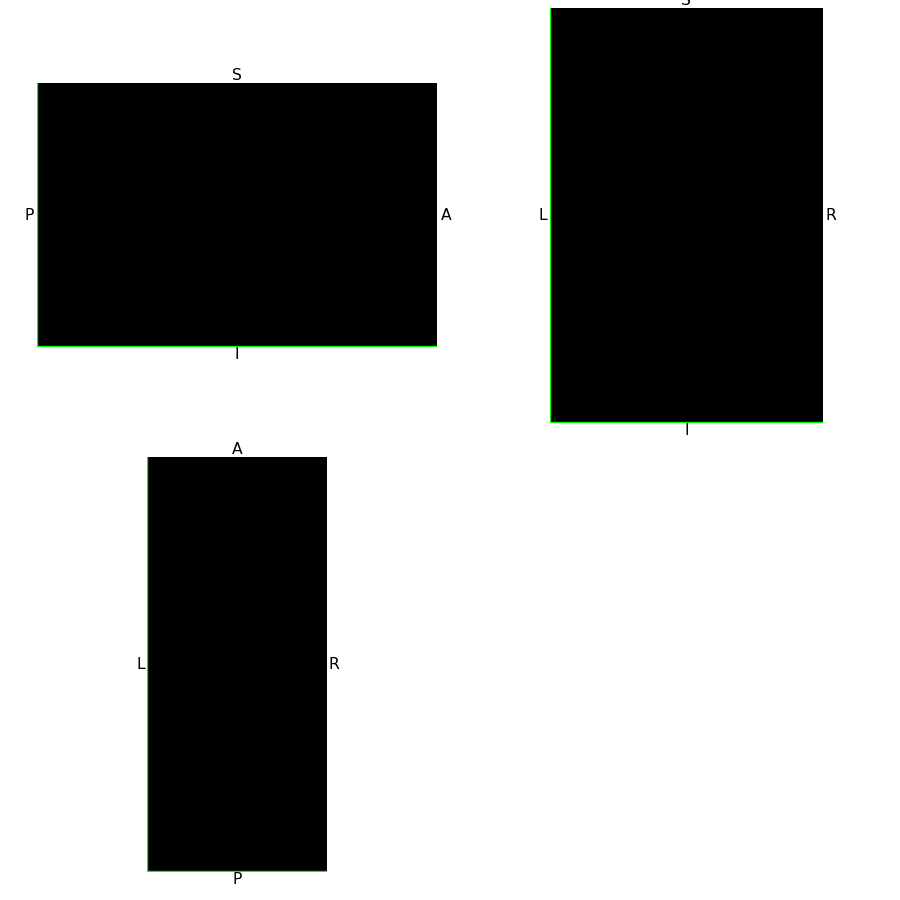

<OrthoSlicer3D: outsurfs/invivo_closed_3.nii.gz (275, 634, 418)>

In [49]:
%matplotlib notebook
volume_data_3.orthoview()

<IPython.core.display.Javascript object>


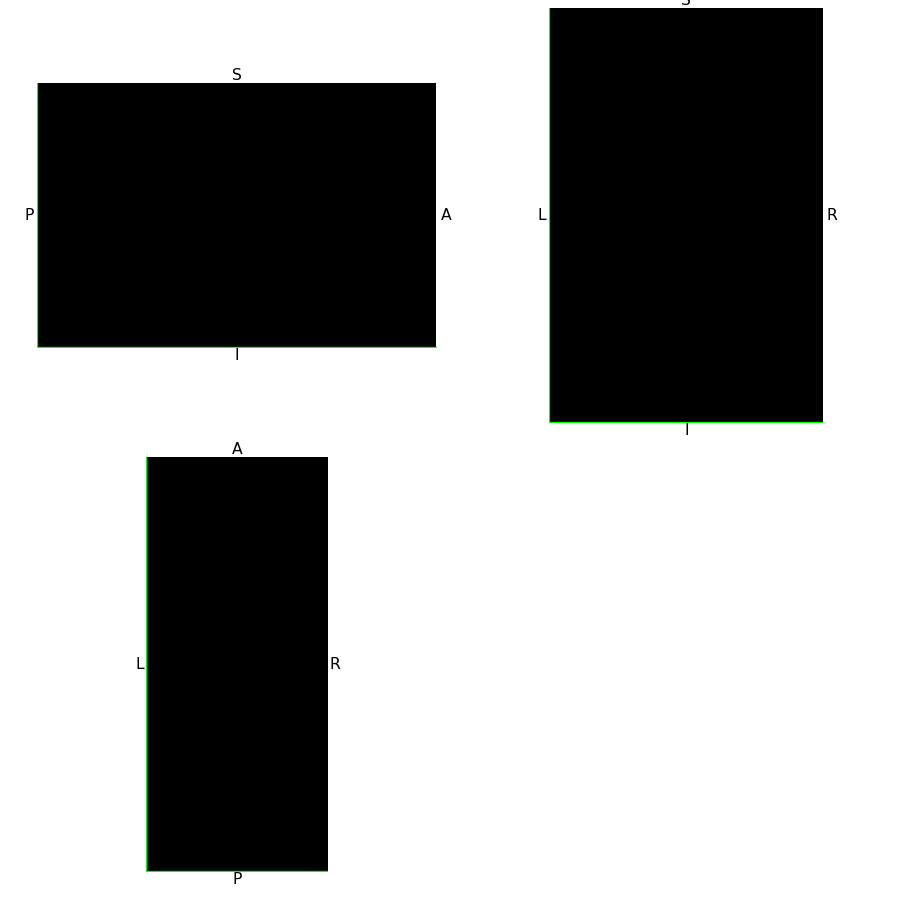

<OrthoSlicer3D: outsurfs/invivo_closed_4.nii.gz (211, 481, 319)>

In [50]:
%matplotlib notebook
volume_data_4.orthoview()

<IPython.core.display.Javascript object>


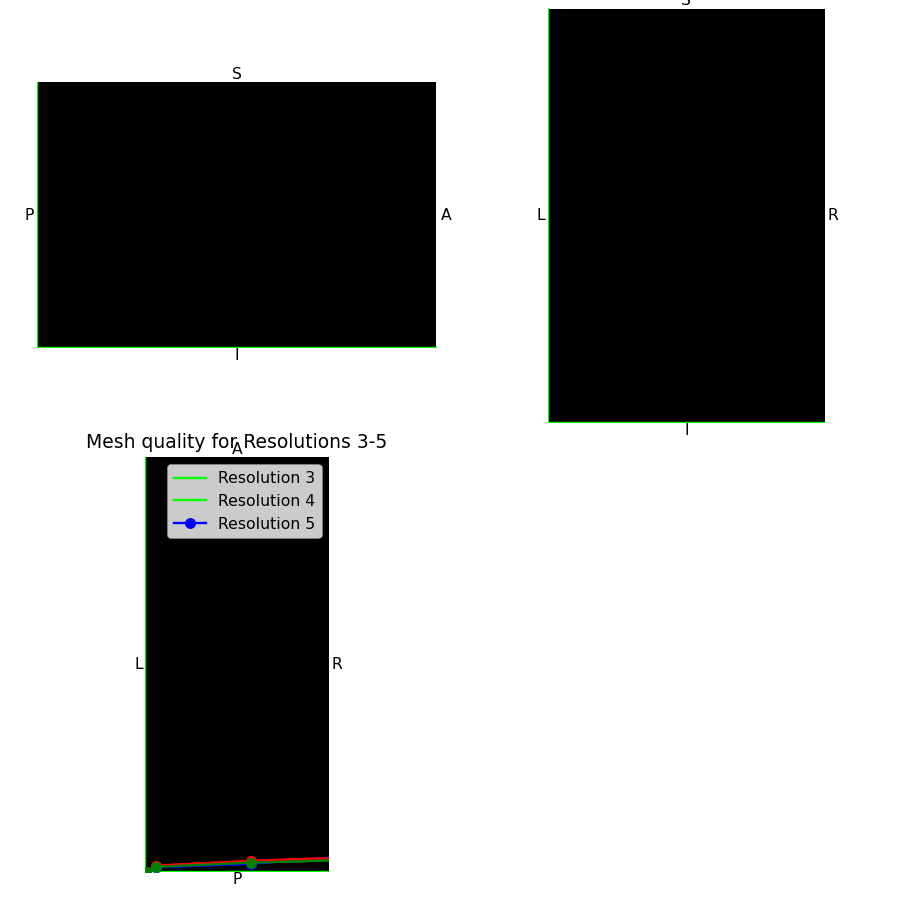

<OrthoSlicer3D: outsurfs/invivo_closed_5.nii.gz (173, 389, 259)>

In [51]:
%matplotlib notebook
volume_data_5.orthoview()

## Reconstruction using Marching Cube and Smoothing with Gaussian

In [52]:
!pip install pymc3

  Using cached numpy-1.22.1-cp310-cp310-win_amd64.whl (14.7 MB)
  Using cached scipy-1.7.3-cp310-cp310-win_amd64.whl (34.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\~3mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [53]:
import pymc3 as pm
import numpy as np
# from skimage.measure import marching_cubes_lewiner
from scipy.spatial import Delaunay
from scipy.ndimage.filters import gaussian_filter

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7348\1724086695.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [54]:
def read_volume(file_path):
    # Read the 3D volume from file
    img = nib.load(file_path)
    volume = img.get_fdata()
    return volume

In [55]:
def volume_to_mesh(volume):
   # Generate the mesh using marching cubes
    verts, faces, _, _ = marching_cubes(volume)

    return verts, faces

In [56]:
def mesh_to_volume(mesh):
    # Compute the Delaunay triangulation of the mesh
    tri = Delaunay(mesh)
    # Compute the volume of each tetrahedron in the triangulation
    vol = tri.volume
    # Compute the center of each tetrahedron in the triangulation
    center = tri.transform[1,:3]
    # Compute the signed distance from each point in the mesh to each tetrahedron
    dist = np.sum((mesh[:,None,:] - center[None,:,:])**2, axis=-1) - vol**2/np.sum((tri.transform[1:,3]-tri.transform[0,3])**2)
    # Convert the signed distances to a binary volume
    volume = np.zeros_like(dist)
    volume[dist < 0] = 1
    return volume

In [57]:
def smooth_mesh(volume):
    volume_smoothed = gaussian_filter(volume, sigma=2)
    # Return the smoothed mesh
    return volume_smoothed

In [58]:
# Load the volume data from a NIfTI file
volume3 = read_volume("outsurfs/invivo_closed_3.nii.gz")
volume4 = read_volume("outsurfs/invivo_closed_4.nii.gz")
volume5 = read_volume("outsurfs/invivo_closed_5.nii.gz")

# Fill in the sulci of the brain
# filled_volume = fill_sulci(volume)

In [59]:
volume_smooth_3 = smooth_mesh(volume3)

In [60]:
volume_smooth_4 = smooth_mesh(volume4)

In [61]:
volume_smooth_5 = smooth_mesh(volume5)

In [62]:
# Generate a mesh from the filled volume
verts_filled,faces_filled =volume_to_mesh(volume_smooth_3)


In [63]:
vertices_filled_2,faces_filled_2 =volume_to_mesh(volume_smooth_4)


In [64]:
vertices_filled_3,faces_filled_3 =volume_to_mesh(volume_smooth_5)


In [65]:
mlab.triangular_mesh(verts_filled[:, 0], verts_filled[:, 1], verts_filled[:, 2], faces_filled)
mlab.show()

In [66]:
mlab.triangular_mesh(vertices_filled_2[:, 0], vertices_filled_2[:, 1], vertices_filled_2[:, 2], faces_filled_2)
mlab.show()

In [67]:
mlab.triangular_mesh(vertices_filled_3[:, 0], vertices_filled_3[:, 1], vertices_filled_3[:, 2], faces_filled_3)
mlab.show()

In [68]:
!git submodule add https://github.com/ThibaultGROUEIX/ChamferDistancePytorch
!pip install torch ninja

fatal: not a git repository (or any of the parent directories): .git


In [69]:
!pip install torch torchvision torchaudio

## Chamfer Distance

In [70]:
!pip install chamferdist

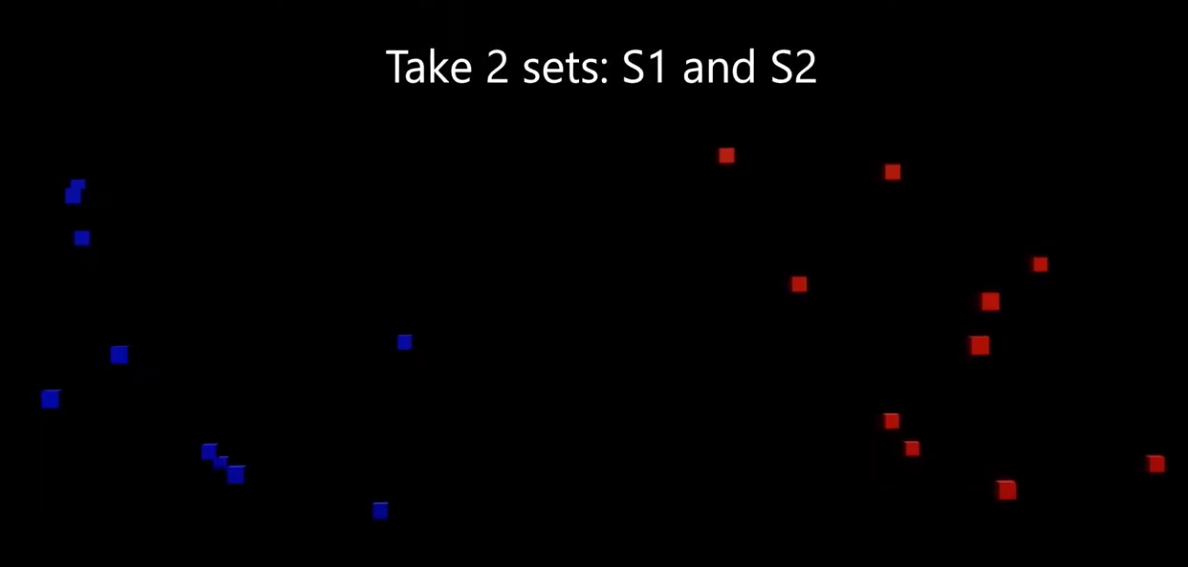

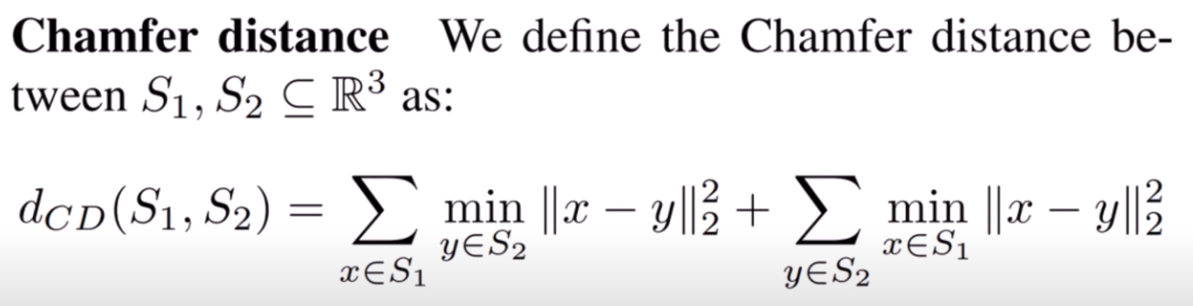

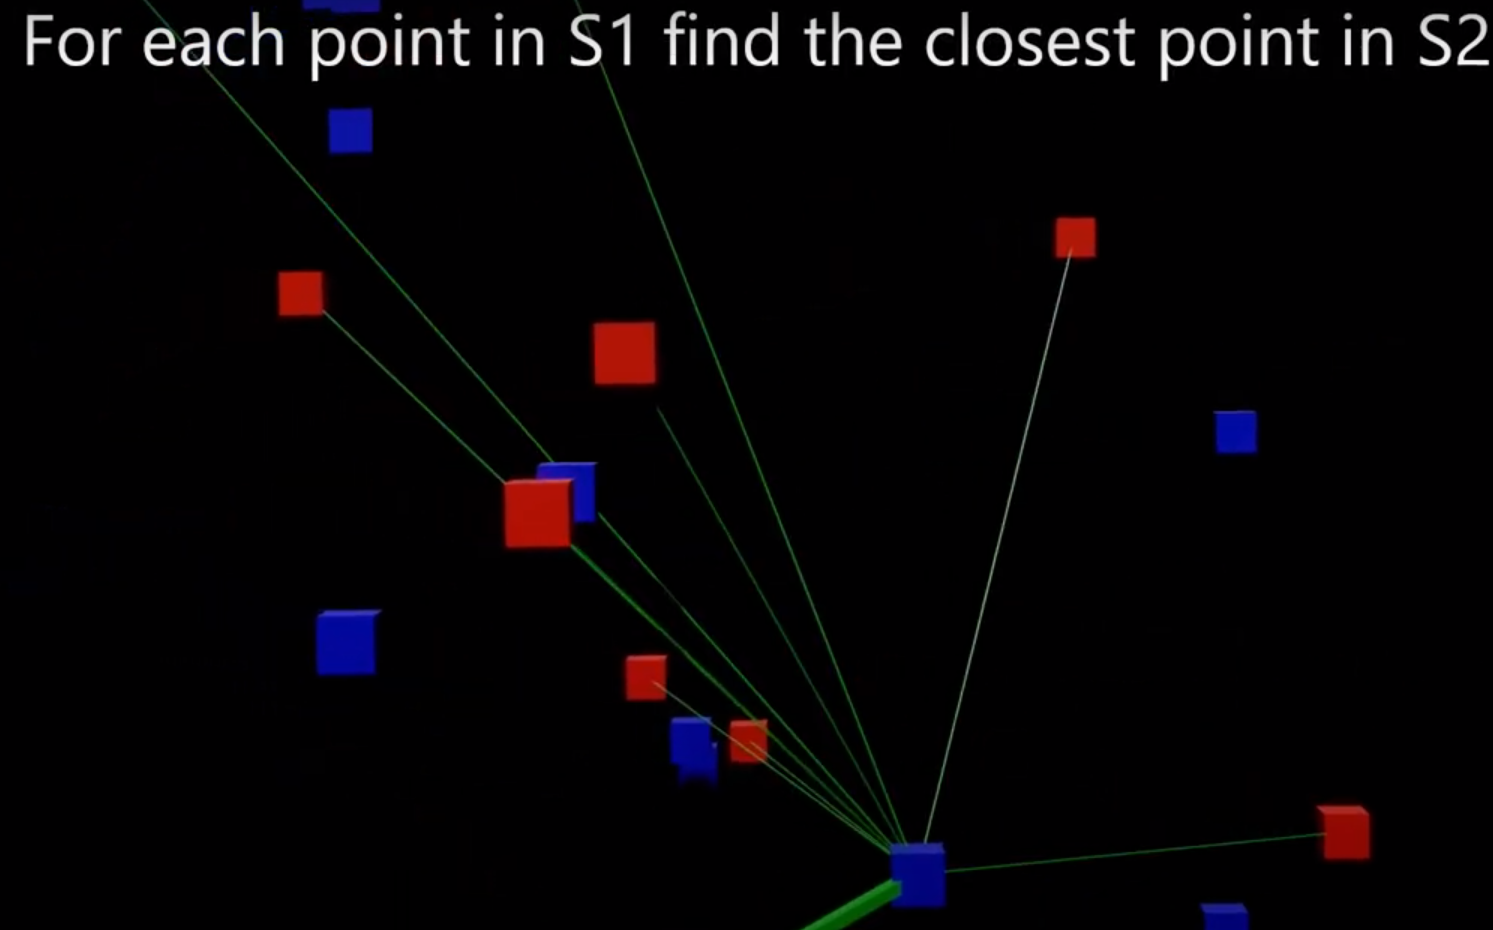

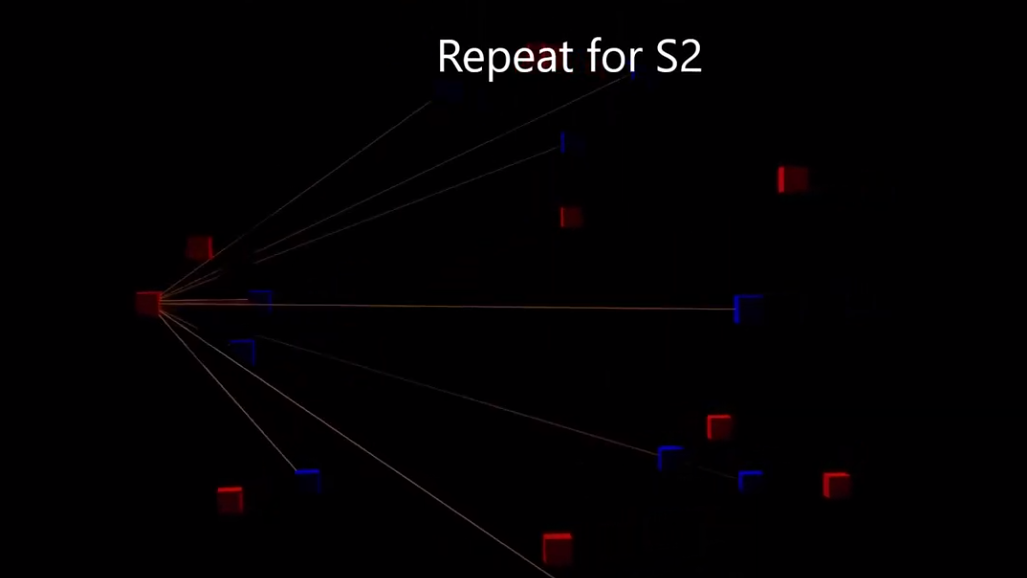

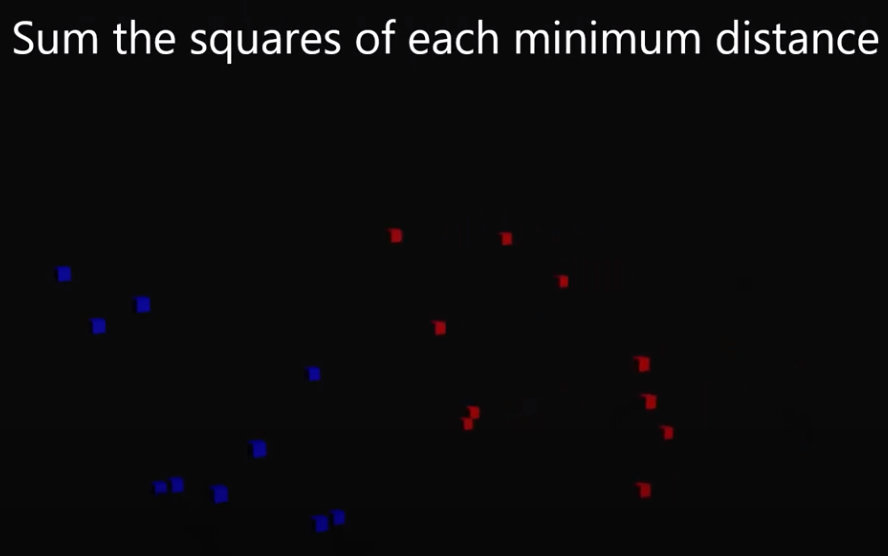

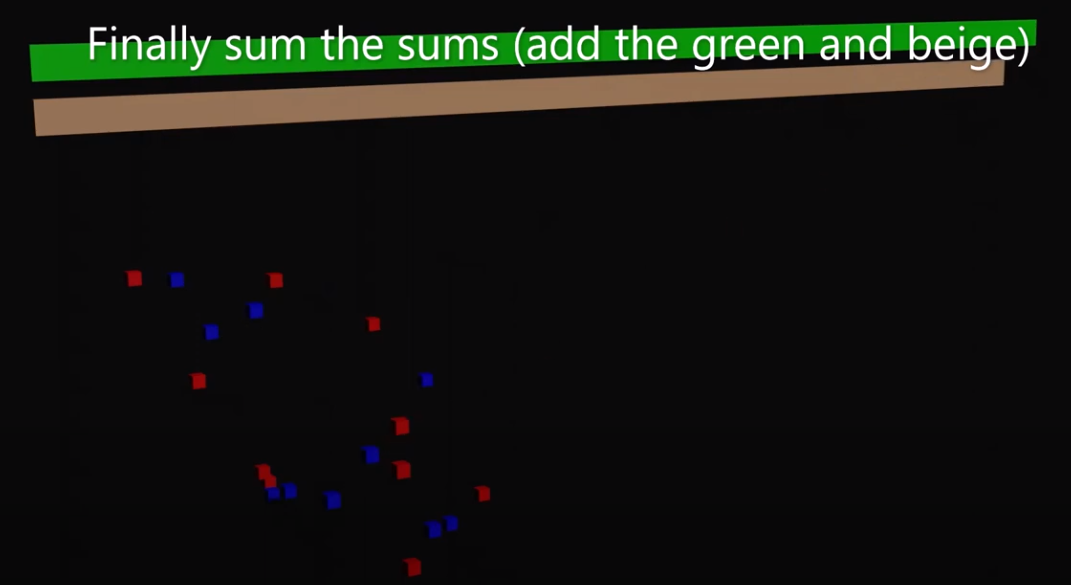

In [71]:
import numpy as np
import torch
import chamferdist
from chamferdist import ChamferDistance
from sklearn.preprocessing import MinMaxScaler

### Custom function to compute Chamfer Distance

In [72]:
def chamfer_distance(x,y):
    x = x.unsqueeze(0)
    y = y.unsqueeze(0)
    x_repeat = x.repeat(y.shape[1], 1, 1)
    y_repeat = y.repeat(x.shape[1], 1, 1)
    dist = torch.sqrt(torch.sum((x_repeat - y_repeat) ** 2, dim=2))
    dist_x_to_y = torch.min(dist, dim=1)[0]
    dist_y_to_x = torch.min(dist, dim=0)[0]
    return torch.mean(dist_x_to_y) + torch.mean(dist_y_to_x)

def compute_mesh_quality(verts1,faces1,verts2,faces2):
    # Convert the meshes to PyTorch3D format
    verts1 = torch.from_numpy(verts1).float()
    faces1 = torch.from_numpy(faces1.astype(np.int64))
    verts2 = torch.from_numpy(verts2.copy()).float()
    faces2 = torch.from_numpy(faces2.astype(np.int64))
    # Compute the density-aware chamfer distance between the meshes
    dist1 = chamfer_distance(verts1, verts2)
    dist2 = chamfer_distance(verts2, verts1)
    quality = (dist1.mean() + dist2.mean()) / 2
    return quality


### Using Chamf Dist Package to compute bidirectional Chamfer Distance

In [73]:
# Initialize Chamfer distance module
chamferDist = ChamferDistance()

In [74]:
# quality_3 = compute_mesh_quality(vertices, faces, verts_filled, faces_filled)

In [75]:
 # Convert the meshes to pointclouds
pointcloud1 = vertices[faces].reshape(-1, 3)
pointcloud2 = verts_filled[faces_filled].reshape(-1, 3)

In [76]:
pointcloud1.shape

(1000410, 3)

In [77]:
pointcloud1 = pointcloud1[:1000,:]

In [78]:
pointcloud1.shape

(1000, 3)

In [79]:
scaler = MinMaxScaler()
pointcloud1 = scaler.fit_transform(pointcloud1)

In [80]:
pointcloud2.shape

(5602116, 3)

In [81]:
pointcloud2 = pointcloud2[:1000,:]

In [82]:
pointcloud2.shape

(1000, 3)

In [83]:
scaler = MinMaxScaler()
pointcloud2 = scaler.fit_transform(pointcloud2)

In [84]:
# Convert the pointclouds to PyTorch tensors
pointcloud1 = torch.from_numpy(pointcloud1).float()
pointcloud2 = torch.from_numpy(pointcloud2).float()

In [85]:
pointcloud1

tensor([[0.6756, 0.0863, 0.4701],
        [0.6515, 0.0307, 0.4501],
        [0.6890, 0.0952, 0.4294],
        ...,
        [0.0038, 0.8103, 0.4135],
        [0.0056, 0.8085, 0.3863],
        [0.0290, 0.7525, 0.4265]])

In [86]:
pointcloud2

tensor([[0.3124, 0.2772, 0.1507],
        [0.3124, 0.3106, 0.1263],
        [0.2548, 0.3106, 0.1507],
        ...,
        [0.6340, 0.1529, 0.1062],
        [0.7523, 0.1004, 0.1062],
        [0.8635, 0.1004, 0.0617]])

In [87]:
# Compute the chamfer distance between the pointclouds
cdist1 = 0.5 * chamferDist(pointcloud1.unsqueeze(0), pointcloud2.unsqueeze(0), bidirectional=True)
cdist2 = 0.5 * chamferDist(pointcloud2.unsqueeze(0), pointcloud1.unsqueeze(0), bidirectional=True)

In [88]:
print("Bi-directional Chamfer distance 1:", cdist1.item())

Bi-directional Chamfer distance 1: 76.26512145996094


In [89]:
print("Bi-directional Chamfer distance 2:", cdist2.item())

Bi-directional Chamfer distance 2: 76.26512145996094


In [90]:
#     dist1, dist2 = chamferdist.chamfer_distance(pointcloud1.unsqueeze(0), pointcloud2.unsqueeze(0))
quality_3 = (cdist1.mean() + cdist2.mean()) / 2

In [91]:
print(f'Mesh quality for Resolution=3: {quality_3}')

Mesh quality for Resolution=3: 76.26512145996094


In [92]:
# quality_4 = compute_mesh_quality(vertices, faces, vertices_filled_2, faces_filled_2)

In [93]:
 # Convert the meshes to pointclouds
pointcloud3 = vertices[faces].reshape(-1, 3)
pointcloud4 = vertices_filled_3[faces_filled_3].reshape(-1, 3)

In [94]:
pointcloud3.shape

(1000410, 3)

In [95]:
pointcloud3 = pointcloud3[:1000,:]

In [96]:
pointcloud3.shape

(1000, 3)

In [97]:
scaler = MinMaxScaler()
pointcloud3 = scaler.fit_transform(pointcloud3)

In [98]:
pointcloud4.shape

(1912848, 3)

In [99]:
pointcloud4 = pointcloud4[:1000,:]

In [100]:
pointcloud4.shape

(1000, 3)

In [101]:
scaler = MinMaxScaler()
pointcloud4 = scaler.fit_transform(pointcloud4)

In [102]:
# Convert the pointclouds to PyTorch tensors
pointcloud3 = torch.from_numpy(pointcloud3).float()
pointcloud4 = torch.from_numpy(pointcloud4).float()

In [103]:
pointcloud3

tensor([[0.6756, 0.0863, 0.4701],
        [0.6515, 0.0307, 0.4501],
        [0.6890, 0.0952, 0.4294],
        ...,
        [0.0038, 0.8103, 0.4135],
        [0.0056, 0.8085, 0.3863],
        [0.0290, 0.7525, 0.4265]])

In [104]:
pointcloud4

tensor([[0.2784, 0.3585, 0.1807],
        [0.2784, 0.3737, 0.1736],
        [0.2582, 0.3737, 0.1807],
        ...,
        [0.6712, 0.5893, 0.8830],
        [0.8101, 0.5893, 0.9415],
        [0.9993, 0.5893, 1.0000]])

In [105]:
# Compute the chamfer distance between the pointclouds
cdist3 = 0.5 * chamferDist(pointcloud3.unsqueeze(0), pointcloud4.unsqueeze(0), bidirectional=True)
cdist4 = 0.5 * chamferDist(pointcloud4.unsqueeze(0), pointcloud3.unsqueeze(0), bidirectional=True)

In [106]:
print("Bi-directional Chamfer distance 3:", cdist3.item())

Bi-directional Chamfer distance 3: 33.19892120361328


In [107]:
print("Bi-directional Chamfer distance 4:", cdist4.item())

Bi-directional Chamfer distance 4: 33.19892120361328


In [108]:
# quality_5 = compute_mesh_quality(vertices, faces, vertices_filled_3, faces_filled_3) 

In [109]:
quality_4 = (cdist3.mean() + cdist4.mean()) / 2

In [110]:
print(f'Mesh quality for Resolution=4: {quality_4}')

Mesh quality for Resolution=4: 33.19892120361328


In [111]:
# Convert the meshes to pointclouds
pointcloud5 = vertices[faces].reshape(-1, 3)
pointcloud6 = vertices_filled_2[faces_filled_2].reshape(-1, 3)

In [112]:
pointcloud5.shape

(1000410, 3)

In [113]:
pointcloud5 = pointcloud5[:1000,:]

In [114]:
pointcloud5.shape

(1000, 3)

In [115]:
scaler = MinMaxScaler()
pointcloud5 = scaler.fit_transform(pointcloud5)

In [116]:
pointcloud6.shape

(3107172, 3)

In [117]:
pointcloud6 = pointcloud6[:1000,:]

In [118]:
pointcloud6.shape

(1000, 3)

In [119]:
scaler = MinMaxScaler()
pointcloud6 = scaler.fit_transform(pointcloud6)

In [120]:
# Convert the pointclouds to PyTorch tensors
pointcloud5 = torch.from_numpy(pointcloud5).float()
pointcloud6 = torch.from_numpy(pointcloud6).float()

In [121]:
pointcloud5

tensor([[0.6756, 0.0863, 0.4701],
        [0.6515, 0.0307, 0.4501],
        [0.6890, 0.0952, 0.4294],
        ...,
        [0.0038, 0.8103, 0.4135],
        [0.0056, 0.8085, 0.3863],
        [0.0290, 0.7525, 0.4265]])

In [122]:
pointcloud6

tensor([[0.2954, 0.3030, 0.2283],
        [0.2954, 0.3035, 0.2278],
        [0.2945, 0.3035, 0.2283],
        ...,
        [1.0000, 0.3653, 0.0000],
        [0.9266, 0.4272, 0.0102],
        [0.9266, 0.4272, 0.0102]])

In [123]:
# Compute the chamfer distance between the pointclouds
cdist5 = 0.5 * chamferDist(pointcloud5.unsqueeze(0), pointcloud6.unsqueeze(0), bidirectional=True)
cdist6 = 0.5 * chamferDist(pointcloud6.unsqueeze(0), pointcloud5.unsqueeze(0), bidirectional=True)

In [124]:
print("Bi-directional Chamfer distance 5:", cdist5.item())

Bi-directional Chamfer distance 5: 42.92750930786133


In [125]:
print("Bi-directional Chamfer distance 6:", cdist6.item())

Bi-directional Chamfer distance 6: 42.92750930786133


In [126]:
quality_5 = (cdist5.mean() + cdist6.mean()) / 2

In [127]:
print(f'Mesh quality for Resolution=5: {quality_5}')

Mesh quality for Resolution=5: 42.92750930786133


## Comparing the quality of different resolutions using different number of vertices

In [130]:
# To get a symmetric measure, the simplest way is to average both the "forward"
# and "backward" distances. This is done by the "bidirectional" flag.

def compute_mesh_quality(verts1,faces1,verts2,faces2,N=3):
    # Convert the meshes to pointclouds
    pointcloud1 = verts1[faces1].reshape(-1, 3)
    pointcloud2 = verts2[faces2].reshape(-1, 3)
    
    # Selecting different number of vertices
    pointcloud1 = pointcloud1[:10**N,:]
    pointcloud2 = pointcloud2[:10**N,:]
    
    # Scaling
    scaler = MinMaxScaler()
    pointcloud1 = scaler.fit_transform(pointcloud1) 
    pointcloud2 = scaler.fit_transform(pointcloud2)
    
    
    # Convert the pointclouds to PyTorch tensors
    pointcloud1 = torch.from_numpy(pointcloud1).float()
    pointcloud2 = torch.from_numpy(pointcloud2).float()
    # Compute the chamfer distance between the pointclouds
    cdist1 = 0.5 * chamferDist(pointcloud1.unsqueeze(0), pointcloud2.unsqueeze(0), bidirectional=True)
    cdist2 = 0.5 * chamferDist(pointcloud2.unsqueeze(0), pointcloud1.unsqueeze(0), bidirectional=True)
    print("Bi-directional Chamfer distance:", cdist1.item())

#     dist1, dist2 = chamferdist.chamfer_distance(pointcloud1.unsqueeze(0), pointcloud2.unsqueeze(0))
    quality = (cdist1.mean() + cdist2.mean()) / 2
    return quality

### Printing the mesh quality for different number of vertices

In [132]:
for i in range(5):
    quality = compute_mesh_quality(vertices, faces, verts_filled, faces_filled,i)
    print(f'Mesh quality for Resolution=3 N={10**i}: {quality}')

Bi-directional Chamfer distance: 0.0
Mesh quality for Resolution=3 N=1: 0.0
Bi-directional Chamfer distance: 4.149906635284424
Mesh quality for Resolution=3 N=10: 4.149906635284424
Bi-directional Chamfer distance: 7.618674278259277
Mesh quality for Resolution=3 N=100: 7.618674278259277
Bi-directional Chamfer distance: 76.26512145996094
Mesh quality for Resolution=3 N=1000: 76.26512145996094
Bi-directional Chamfer distance: 274.73651123046875
Mesh quality for Resolution=3 N=10000: 274.73651123046875


In [133]:
for i in range(5):
    quality = compute_mesh_quality(vertices, faces, vertices_filled_2, faces_filled_2,i)
    print(f'Mesh quality for Resolution=4 N={10**i}: {quality}')

Bi-directional Chamfer distance: 0.0
Mesh quality for Resolution=4 N=1: 0.0
Bi-directional Chamfer distance: 5.6611433029174805
Mesh quality for Resolution=4 N=10: 5.6611433029174805
Bi-directional Chamfer distance: 10.09234619140625
Mesh quality for Resolution=4 N=100: 10.09234619140625
Bi-directional Chamfer distance: 42.92750930786133
Mesh quality for Resolution=4 N=1000: 42.92750930786133
Bi-directional Chamfer distance: 182.66587829589844
Mesh quality for Resolution=4 N=10000: 182.66587829589844


In [134]:
for i in range(5):
    quality = compute_mesh_quality(vertices, faces, vertices_filled_3, faces_filled_3,i)
    print(f'Mesh quality for Resolution=5 N={10**i}: {quality}')

Bi-directional Chamfer distance: 0.0
Mesh quality for Resolution=5 N=1: 0.0
Bi-directional Chamfer distance: 4.538132667541504
Mesh quality for Resolution=5 N=10: 4.538132667541504
Bi-directional Chamfer distance: 8.603797912597656
Mesh quality for Resolution=5 N=100: 8.603797912597656
Bi-directional Chamfer distance: 33.19892120361328
Mesh quality for Resolution=5 N=1000: 33.19892120361328
Bi-directional Chamfer distance: 168.83255004882812
Mesh quality for Resolution=5 N=10000: 168.83255004882812


### Plotting the results for different resolutions

In [136]:
import matplotlib.pyplot as plt

quality_list = []
quality_list_2 = []
quality_list_3 = []

for i in range(5):
    quality = compute_mesh_quality(vertices, faces, verts_filled, faces_filled,i)
    quality_list.append(quality)
    
    quality_2 = compute_mesh_quality(vertices, faces, vertices_filled_2, faces_filled_2,i)
    quality_list_2.append(quality_2)
    
    quality_3 = compute_mesh_quality(vertices, faces, vertices_filled_3, faces_filled_3,i)
    quality_list_3.append(quality_3)

N_list = [10**i for i in range(5)]

Bi-directional Chamfer distance: 0.0
Bi-directional Chamfer distance: 0.0
Bi-directional Chamfer distance: 0.0
Bi-directional Chamfer distance: 4.149906635284424
Bi-directional Chamfer distance: 5.6611433029174805
Bi-directional Chamfer distance: 4.538132667541504
Bi-directional Chamfer distance: 7.618674278259277
Bi-directional Chamfer distance: 10.09234619140625
Bi-directional Chamfer distance: 8.603797912597656
Bi-directional Chamfer distance: 76.26512145996094
Bi-directional Chamfer distance: 42.92750930786133
Bi-directional Chamfer distance: 33.19892120361328
Bi-directional Chamfer distance: 274.73651123046875
Bi-directional Chamfer distance: 182.66587829589844
Bi-directional Chamfer distance: 168.83255004882812


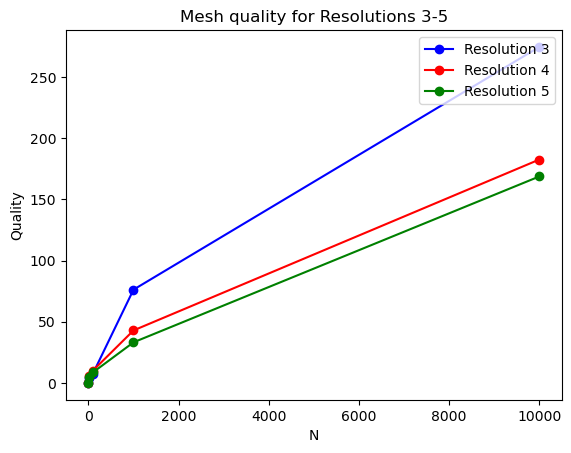

In [139]:
%matplotlib inline
plt.plot(N_list, quality_list, color='blue', marker='o')
plt.plot(N_list, quality_list_2, color='red', marker='o')
plt.plot(N_list, quality_list_3, color='green', marker='o')
plt.title('Mesh quality for Resolutions 3-5')
plt.xlabel('N')
plt.ylabel('Quality')
plt.legend(['Resolution 3', 'Resolution 4', 'Resolution 5'], loc='upper right')
plt.show()

In [ ]:
surface_mesh = mesh.Mesh(np.zeros(faces_filled.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled):
    for j in range(3):
        surface_mesh.vectors[i][j] = verts_filled[f[j], :]

surface_mesh.save('outsurfs/invivo_surface_mesh_3.stl')

In [ ]:
surface_mesh_2 = mesh.Mesh(np.zeros(faces_filled_2.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled_2):
    for j in range(3):
        surface_mesh_2.vectors[i][j] = vertices_filled_2[f[j], :]

surface_mesh_2.save('outsurfs/invivo_surface_mesh_4.stl')

In [ ]:
surface_mesh_3 = mesh.Mesh(np.zeros(faces_filled_3.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled_3):
    for j in range(3):
        surface_mesh_3.vectors[i][j] = vertices_filled_3[f[j], :]

surface_mesh_3.save('outsurfs/invivo_surface_mesh_5.stl')

In [ ]:
!pip install libigl
!pip install --upgrade setuptools
!pip install git+https://github.com/skoch9/meshplot.git
!pip install plotly

In [ ]:
import igl # Read Triangular meshes
# Ploting libraries
import plotly.io as pio
pio.renderers.default = "sphinx_gallery"
import meshplot as mp # Visualization

In [ ]:
# # Load the remeshed obj
v1, f1 = igl.read_triangle_mesh('outsurfs/invivo_surface_mesh_smooth_3.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "green", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "yellow", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v1,f1, return_plot= True, c=v1[:, 1], shading=shading)

In [ ]:
# # Load the remeshed obj
v2, f2 = igl.read_triangle_mesh('outsurfs/invivo_surface_mesh_smooth_4.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "black", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "black", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v2,f2, return_plot= True, c=v2[:, 1], shading=shading)

In [ ]:
# # Load the remeshed obj
v3, f3 = igl.read_triangle_mesh('outsurfs/invivo_surface_mesh_smooth_5.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "black", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "black", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v3,f3, return_plot= True, c=v2[:, 1], shading=shading)

In [ ]:
surface_mesh = mesh.Mesh.from_file('outsurfs/invivo_surface_mesh_3.stl')

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from stl import mesh

In [ ]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(surface_mesh.vectors))

# scale = surface_mesh.points.flatten(-1)
# ax.auto_scale_xyz(scale, scale, scale)

plt.show()

In [ ]:
surface_mesh_2 = mesh.Mesh.from_file('outsurfs/invivo_surface_mesh_4.stl')

In [ ]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(surface_mesh_2.vectors))

scale = surface_mesh.points.flatten(-1)
ax.auto_scale_xyz(scale, scale, scale)

plt.show()

In [ ]:
surface_mesh_3 = mesh.Mesh.from_file('outsurfs/invivo_surface_mesh_5.stl')

In [ ]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(surface_mesh_3.vectors))

scale = surface_mesh.points.flatten(-1)
ax.auto_scale_xyz(scale, scale, scale)

plt.show()